In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_excel('multi_linear_Data.xlsx')
df1 = pd.DataFrame(df)
df1.head(4)

,Unnamed: 0,Number of student,Number of subject,Marks obtained
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,10.0,2.0,14.0
3,NaN,30.0,5.0,12.0


In [2]:
print(df1.isnull().sum())
df1.shape

Unnamed: 0           25
Number of student     2
Number of subject     2
Marks obtained        2
dtype: int64


(25, 4)

In [3]:
df2 = df1.drop(["Unnamed: 0"],axis=1)
df3 = df2.dropna()
df3

,Number of student,Number of subject,Marks obtained
2,10.0,2.0,14.0
3,30.0,5.0,12.0
4,60.0,7.0,18.0
5,20.0,8.0,16.0
6,15.0,9.0,15.0
7,40.0,1.0,16.0
8,38.0,3.0,17.0
9,80.0,12.0,60.0
10,90.0,34.0,68.0
11,10.0,1.0,14.0


In [4]:
df3.isnull().sum()

# Checking the unique values

def checkUniqueValues(dataframe):
     columns = df3.columns
     for column in columns:
          unique_col = df3[column].nunique()
          print(f'{column} has {unique_col} values')

Number of student has 18 values
Number of subject has 19 values
Marks obtained has 18 values
    Number of student  Number of subject  Marks obtained
2                10.0                2.0            14.0
3                30.0                5.0            12.0
4                60.0                7.0            18.0
5                20.0                8.0            16.0
6                15.0                9.0            15.0
7                40.0                1.0            16.0
8                38.0                3.0            17.0
9                80.0               12.0            60.0
10               90.0               34.0            68.0
11               10.0                1.0            14.0
12               13.0               23.0            27.0
13               19.0                0.0            34.0
14               25.0                6.0            40.0
15               20.0                8.0            67.0
16               18.0                4.0            

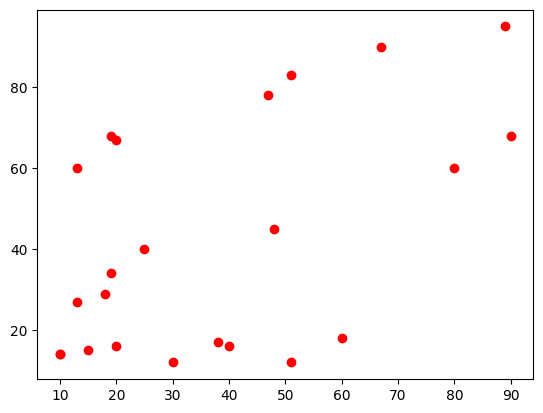

In [5]:
checkUniqueValues(df3)
print(df3)
print(df3.shape)

plt.scatter(df3['Number of student'],df3['Marks obtained'],color='r')
plt.show()

In [6]:
df4 = df3.duplicated(subset=['Marks obtained'])
print(df4)
df4 = df3.drop_duplicates(subset = ['Marks obtained'],keep = 'last')
df4

2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11     True
12    False
13    False
14    False
15    False
16    False
17     True
18    False
19    False
20    False
21    False
22    False
23     True
24     True
dtype: bool


,Number of student,Number of subject,Marks obtained
4,60.0,7.0,18.0
6,15.0,9.0,15.0
7,40.0,1.0,16.0
8,38.0,3.0,17.0
11,10.0,1.0,14.0
12,13.0,23.0,27.0
13,19.0,0.0,34.0
14,25.0,6.0,40.0
15,20.0,8.0,67.0
16,18.0,4.0,29.0


In [7]:
df4.reset_index(inplace=True,drop=True)
df4

,Number of student,Number of subject,Marks obtained
0,60.0,7.0,18.0
1,15.0,9.0,15.0
2,40.0,1.0,16.0
3,38.0,3.0,17.0
4,10.0,1.0,14.0
5,13.0,23.0,27.0
6,19.0,0.0,34.0
7,25.0,6.0,40.0
8,20.0,8.0,67.0
9,18.0,4.0,29.0


    Number of student  Number of subject  Marks obtained
0                60.0                7.0            18.0
1                15.0                9.0            15.0
2                40.0                1.0            16.0
3                38.0                3.0            17.0
4                10.0                1.0            14.0
5                13.0               23.0            27.0
6                19.0                0.0            34.0
7                25.0                6.0            40.0
8                20.0                8.0            67.0
9                18.0                4.0            29.0
10               19.0                5.0            68.0
11               67.0               11.0            90.0
12               89.0               23.0            95.0
13               48.0               14.0            45.0
14               47.0               19.0            78.0
15               51.0               10.0            83.0
16               51.0          

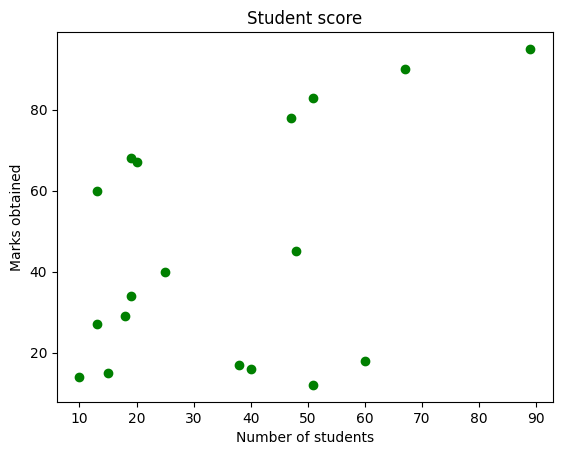

In [8]:

print(df4)
print(df4.shape)
plt.scatter(df4['Number of student'],df4['Marks obtained'],color='g')
plt.xlabel('Number of students')
plt.ylabel('Marks obtained')
plt.title('Student score')
plt.show()

In [9]:
lin_reg = linear_model.LinearRegression()
X = np.asanyarray(df4['Number of student'])
y = np.asanyarray(df4['Marks obtained'])
print(X)
print(y)

[60. 15. 40. 38. 10. 13. 19. 25. 20. 18. 19. 67. 89. 48. 47. 51. 51. 13.]
[18. 15. 16. 17. 14. 27. 34. 40. 67. 29. 68. 90. 95. 45. 78. 83. 12. 60.]


(18,)


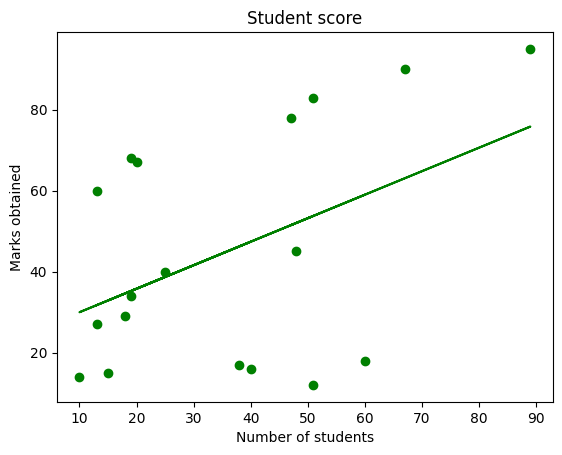

In [11]:
X = X.reshape(-1,1)
regr = lin_reg.fit(X,y)
pred = regr.predict(X)
print(pred.shape)
plt.scatter(df4['Number of student'],df4['Marks obtained'],color='g')
plt.xlabel('Number of students')
plt.ylabel('Marks obtained')
plt.title('Student score')
plt.plot(X,pred,color='g')
plt.show()


In [ ]:
num = int(input('Enter number of students'))
b = regr.predict([[num]])[0]
print("Marks Scored:{}".format(b))

Marks Scored:56.08118225318186
